In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
class SIR_model():
    def __init__(self, timesteps, pop_size, prop_init_infected, beta, gamma):
        self.T = timesteps
        self.N = pop_size
        self.p_I0  = prop_init_infected
        self.beta = beta # transmission rate
        self.gamma = gamma # average rate of recovery (cases / timesteps)



    def simulate(self):
        S = np.zeros(self.T)
        I = np.zeros(self.T)
        R = np.zeros(self.T)
        
        I[0] = int(self.p_I0 * self.N)
        R[0] = 0
        S[0] = self.N - I[0]
        for t in range(1, self.T):
            S[t] = S[t-1] - int(self.beta * I[t-1] * S[t-1] / self.N)
            I[t] = I[t-1] + int(self.beta * I[t-1] * S[t-1] / self.N) - int(self.gamma * I[t-1])
            R[t] = R[t-1] + int(self.gamma * I[t-1])

        return S, I, R

In [3]:
sir = SIR_model(20, 100, 0.2, .1, .1)
S, I, R = sir.simulate()

What is $\beta$? A combination of how many people are contacted per day (contact rate) and how likely a sick person is to transmit the disease (force of infection)

In [5]:
# sir = SIR_model()
# https://jckantor.github.io/CBE30338/03.09-COVID-19.html
# infection period (1/gamma) is 8.4 days
# R_o is 2.4 (beta / gamma) or (recovery_time / time_between contacts)
# avg. number of people infected by a hypothetical case in a fully susceptible population
# think: 

In [6]:
"plt.plot(x, model.S / N, label=\"Susceptible\")\n",
"plt.plot(x, model.I/N, label=\"Infected\")\n",
"plt.ylim(0, 1.1)\n",
"plt.legend(loc=\"upper right\")\n",
"plt.show()"

'plt.show()'

In [4]:
# english boarding school flu epidemic
df = pd.read_csv("https://bit.ly/2vDqAYN", sep="\t")
# N = 763
# R_0 between 1 and 2
# infection period: ballpark 5-7 days

In [5]:
df

,day,cases
0,0,1
1,1,6
2,2,26
3,3,73
4,4,222
5,5,293
6,6,258
7,7,236
8,8,191
9,9,124


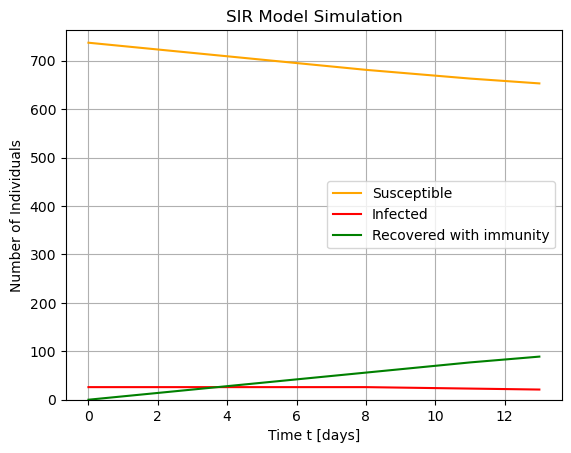

In [6]:
N = 763

# initial infected proportion
p_I0 = df['cases'][2] / N # initial number of infecteds is quite small

# transmission rate (beta) and recovery rate (gamma)
beta = 0.3
gamma = 0.3

sir = SIR_model(len(df), N, p_I0, beta, gamma)

S, I, R = sir.simulate()


plt.figure()
plt.grid()
plt.title("SIR Model Simulation")
plt.plot(df['day'], S, 'orange', label='Susceptible')
plt.plot(df['day'], I, 'r', label='Infected')
plt.plot(df['day'], R, 'g', label='Recovered with immunity')
plt.xlabel('Time t [days]')
plt.ylabel('Number of Individuals')
plt.ylim([0, N])
plt.legend()
plt.show()

In [7]:
S

array([737., 730., 723., 716., 709., 702., 695., 688., 681., 675., 669.,
       663., 658., 653.])

## Michigan Data (without county)

In [14]:
michigan = pd.read_csv("michigan-history.csv")
# reverse row order and reset index
michigan = michigan.loc[::-1].reset_index(drop=True)

In [16]:
michigan.head() # the earliest record is at the top of the dataframe. 

,date,state,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,...,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
0,2020-03-01,MI,NaN,0,0,0,NaN,NaN,NaN,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN,0
1,2020-03-02,MI,NaN,0,0,0,NaN,NaN,NaN,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN,0
2,2020-03-03,MI,NaN,0,0,0,NaN,NaN,NaN,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN,0
3,2020-03-04,MI,NaN,0,0,0,NaN,NaN,NaN,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN,0
4,2020-03-05,MI,NaN,0,0,0,NaN,NaN,NaN,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN,0


In [21]:
michigan.columns

Index(['date', 'state', 'death', 'deathConfirmed', 'deathIncrease',
       'deathProbable', 'hospitalized', 'hospitalizedCumulative',
       'hospitalizedCurrently', 'hospitalizedIncrease', 'inIcuCumulative',
       'inIcuCurrently', 'negative', 'negativeIncrease',
       'negativeTestsAntibody', 'negativeTestsPeopleAntibody',
       'negativeTestsViral', 'onVentilatorCumulative', 'onVentilatorCurrently',
       'positive', 'positiveCasesViral', 'positiveIncrease', 'positiveScore',
       'positiveTestsAntibody', 'positiveTestsAntigen',
       'positiveTestsPeopleAntibody', 'positiveTestsPeopleAntigen',
       'positiveTestsViral', 'recovered', 'totalTestEncountersViral',
       'totalTestEncountersViralIncrease', 'totalTestResults',
       'totalTestResultsIncrease', 'totalTestsAntibody', 'totalTestsAntigen',
       'totalTestsPeopleAntibody', 'totalTestsPeopleAntigen',
       'totalTestsPeopleViral', 'totalTestsPeopleViralIncrease',
       'totalTestsViral', 'totalTestsViralIncrease'

In [17]:
michigan['increase_positive'] = michigan['positive'].diff()
michigan['increase_positive'].fillna(14, inplace=True) # the initial one. 

In [28]:
# column positive = cases
# N = 10077331 # Population, Census, April 1, 2020
N = 100000

# initial infected proportion
p_I0 = 14.0 / N

michigan['day_index'] = range(len(michigan))

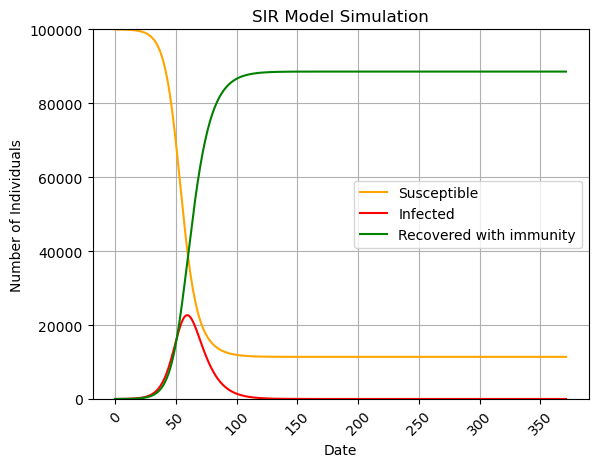

In [29]:
# parameter values: https://jckantor.github.io/CBE30338/03.09-COVID-19.html
R0 = 2.4
t_infective = 5.1 + 3.3

gamma = 1/t_infective
beta = R0*gamma # transmission rate (beta) and recovery rate (gamma)

sir = SIR_model(len(michigan), N, p_I0, beta, gamma)
S, I, R = sir.simulate()

# Plotting
plt.figure()
plt.grid()
plt.title("SIR Model Simulation")
plt.plot(michigan['day_index'], S, 'orange', label='Susceptible')
plt.plot(michigan['day_index'], I, 'r', label='Infected')
plt.plot(michigan['day_index'], R, 'g', label='Recovered with immunity')
plt.xlabel('Date')
plt.ylabel('Number of Individuals')
plt.ylim([0, N])
plt.legend()
plt.xticks(rotation=45)  # Rotate dates for better visibility
plt.show()

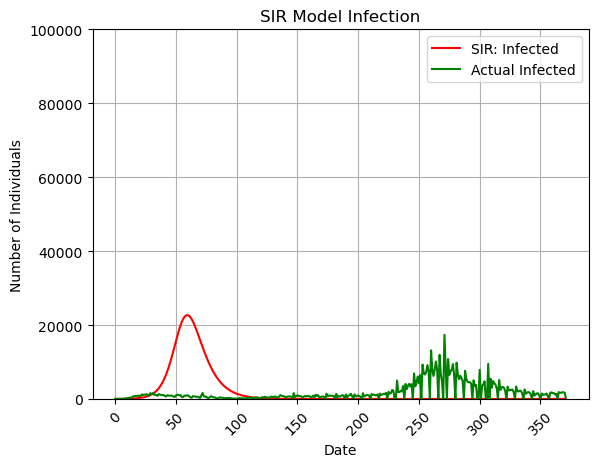

In [30]:
plt.figure()
plt.grid()
plt.title("SIR Model Infection")
plt.plot(michigan['day_index'], I, 'r', label='SIR: Infected')
plt.plot(michigan['day_index'], michigan["increase_positive"], 'g', label='Actual Infected')
plt.xlabel('Date')
plt.ylabel('Number of Individuals')
plt.ylim([0, N])
plt.legend()
plt.xticks(rotation=45)  # Rotate dates for better visibility
plt.show()

## Two Transmission Rate Model

* Case1 (Segregrated Groups): $\beta_{01} = \beta_{10} = 0$
* Case2 (Symmetric Interaction): $\beta_{01} = \beta_{10}$
* Case3 (Asymmetric Interaction): $\beta_{01}, \beta_{10}$ should be set to different values

In [40]:
import numpy as np

class SIR_model():
    def __init__(self, timesteps, 
                 pop_size_0, pop_size_1, 
                 prop_init_infected_0, prop_init_infected_1, 
                 beta_00, beta_01, beta_10, beta_11, 
                 gamma):
        
        self.T = timesteps
        self.N_0 = pop_size_0
        self.N_1 = pop_size_1
        self.p_I0_0 = prop_init_infected_0
        self.p_I0_1 = prop_init_infected_1
        
        # transmission rates
        self.beta_00 = beta_00 # group 0 infecting group 0
        self.beta_01 = beta_01 # group 0 infecting group 1
        self.beta_10 = beta_10 # group 1 infecting group 0
        self.beta_11 = beta_11 # group 1 infecting group 1
        
        self.gamma = gamma # average recovery rate

    def simulate(self):
        S_0, I_0, R_0 = np.zeros(self.T), np.zeros(self.T), np.zeros(self.T)
        S_1, I_1, R_1 = np.zeros(self.T), np.zeros(self.T), np.zeros(self.T)
        
        # initialize populations
        I_0[0], I_1[0] = int(self.p_I0_0 * self.N_0), int(self.p_I0_1 * self.N_1)
        S_0[0], S_1[0] = self.N_0 - I_0[0], self.N_1 - I_1[0]
        
        for t in range(1, self.T):
            # group 0 
            new_infections_0 = (self.beta_00 * I_0[t-1] * S_0[t-1] / self.N_0) + (self.beta_10 * I_1[t-1] * S_0[t-1] / self.N_0)
            S_0[t] = S_0[t-1] - new_infections_0
            I_0[t] = I_0[t-1] + new_infections_0 - self.gamma * I_0[t-1]
            R_0[t] = R_0[t-1] + self.gamma * I_0[t-1]
            
            # group 1
            new_infections_1 = (self.beta_11 * I_1[t-1] * S_1[t-1] / self.N_1) + (self.beta_01 * I_0[t-1] * S_1[t-1] / self.N_1)
            S_1[t] = S_1[t-1] - new_infections_1
            I_1[t] = I_1[t-1] + new_infections_1 - self.gamma * I_1[t-1]
            R_1[t] = R_1[t-1] + self.gamma * I_1[t-1]

        return S_0, I_0, R_0, S_1, I_1, R_1

In [48]:
N = 100000
p_I0_0 = 14.0 / N  # initial infected proportion for Group 0
p_I0_1 = 7.0 / N   
t_infective = 5.1 + 3.3  # avg infectious period
gamma = 1 / t_infective
R0 = 2.4
beta = R0 * gamma

pop_size_0 = N / 2  
pop_size_1 = N / 2


# Case 1: Segregated Groups
sir_case1 = SIR_model(len(michigan), pop_size_0, pop_size_1, p_I0_0, p_I0_1, beta, 0, 0, beta, gamma)

# Case 2: Symmetric Interaction
sir_case2 = SIR_model(len(michigan), pop_size_0, pop_size_1, p_I0_0, p_I0_1, beta, 0.5*beta, 0.5*beta, beta, gamma)

# Case 3: Asymmetric Interaction
sir_case3 = SIR_model(len(michigan), pop_size_0, pop_size_1, p_I0_0, p_I0_1, beta, 0.2*beta, 0.8*beta, beta, gamma)

S0_case1, I0_case1, R0_case1, S1_case1, I1_case1, R1_case1 = sir_case1.simulate()
S0_case2, I0_case2, R0_case2, S1_case2, I1_case2, R1_case2 = sir_case2.simulate()
S0_case3, I0_case3, R0_case3, S1_case3, I1_case3, R1_case3 = sir_case3.simulate()

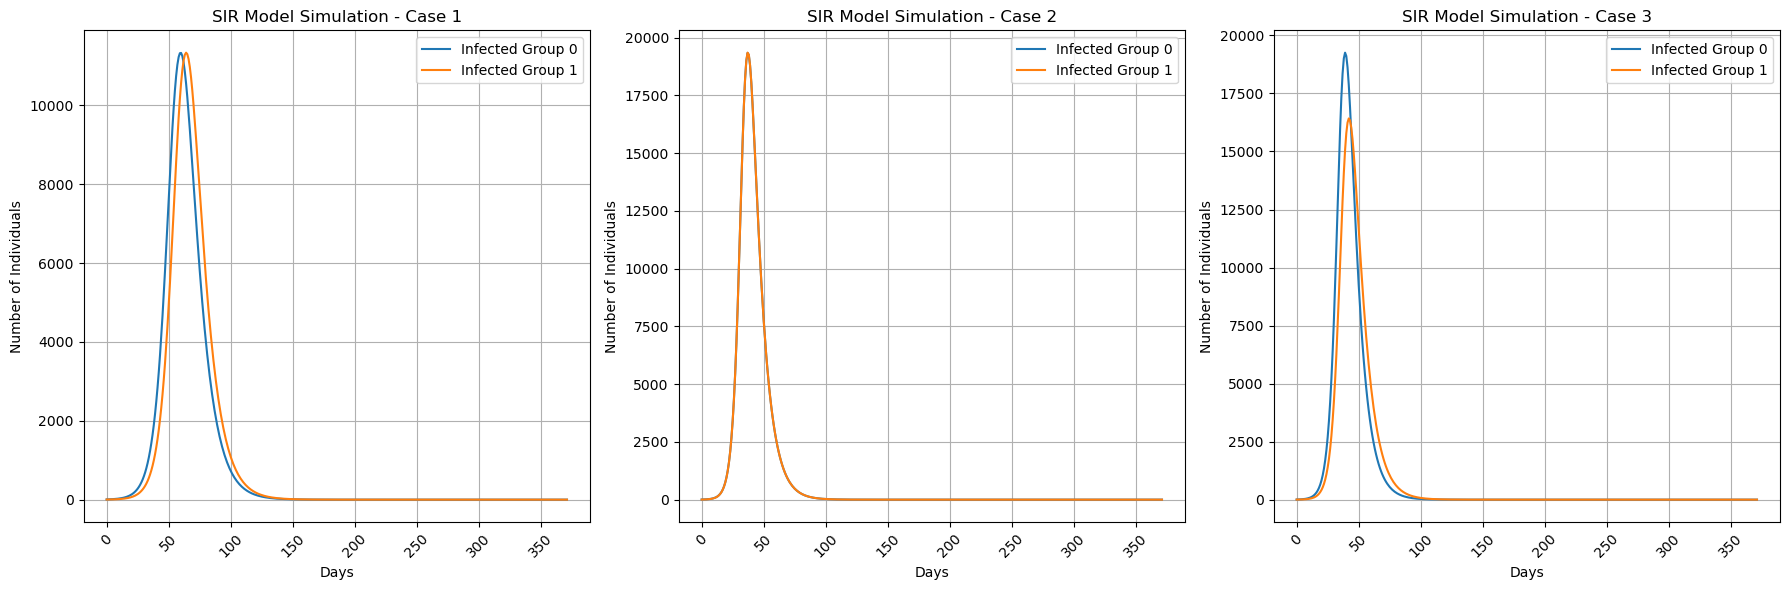

In [49]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Plot for Case 1
axes[0].grid(True)
axes[0].set_title("SIR Model Simulation - Case 1")
axes[0].plot(michigan['day_index'], I0_case1, label='Infected Group 0')
axes[0].plot(michigan['day_index'], I1_case1, label='Infected Group 1')
axes[0].set_xlabel('Days')
axes[0].set_ylabel('Number of Individuals')
axes[0].legend()
axes[0].tick_params(axis='x', rotation=45)

# Plot for Case 2
axes[1].grid(True)
axes[1].set_title("SIR Model Simulation - Case 2")
axes[1].plot(michigan['day_index'], I0_case2, label='Infected Group 0')
axes[1].plot(michigan['day_index'], I1_case2, label='Infected Group 1')
axes[1].set_xlabel('Days')
axes[1].set_ylabel('Number of Individuals')
axes[1].legend()
axes[1].tick_params(axis='x', rotation=45)

# Plot for Case 3
axes[2].grid(True)
axes[2].set_title("SIR Model Simulation - Case 3")
axes[2].plot(michigan['day_index'], I0_case3, label='Infected Group 0')
axes[2].plot(michigan['day_index'], I1_case3, label='Infected Group 1')
axes[2].set_xlabel('Days')
axes[2].set_ylabel('Number of Individuals')
axes[2].legend()
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()  # Adjust layout to not overlap
plt.show()

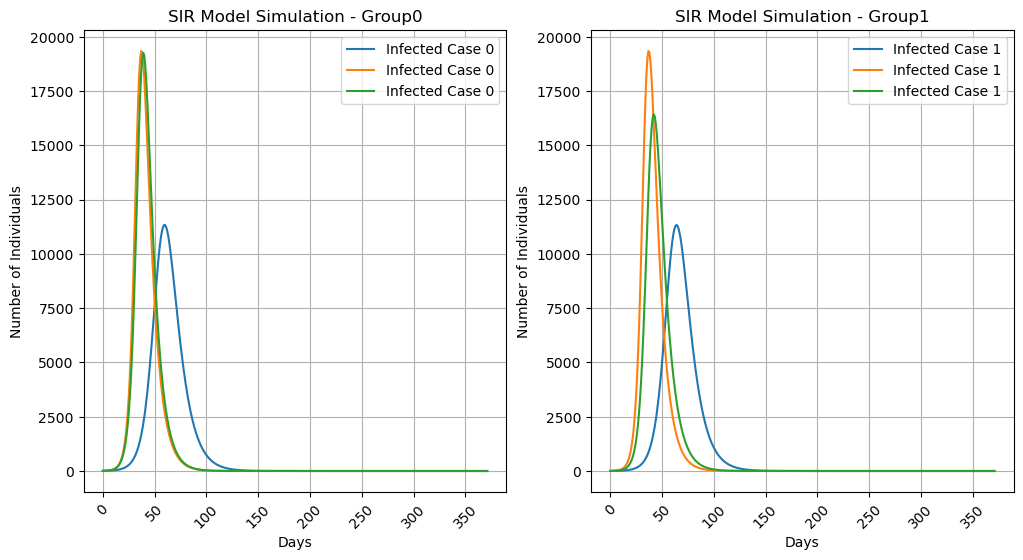

In [51]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot for Group 1
axes[0].grid(True)
axes[0].set_title("SIR Model Simulation - Group0")
axes[0].plot(michigan['day_index'], I0_case1, label='Infected Case 0')
axes[0].plot(michigan['day_index'], I0_case2, label='Infected Case 0')
axes[0].plot(michigan['day_index'], I0_case3, label='Infected Case 0')
axes[0].set_xlabel('Days')
axes[0].set_ylabel('Number of Individuals')
axes[0].legend()
axes[0].tick_params(axis='x', rotation=45)

# Plot for Group 1
axes[1].grid(True)
axes[1].set_title("SIR Model Simulation - Group1")
axes[1].plot(michigan['day_index'], I1_case1, label='Infected Case 1')
axes[1].plot(michigan['day_index'], I1_case2, label='Infected Case 1')
axes[1].plot(michigan['day_index'], I1_case3, label='Infected Case 1')
axes[1].set_xlabel('Days')
axes[1].set_ylabel('Number of Individuals')
axes[1].legend()
axes[1].tick_params(axis='x', rotation=45)